# Model: Titanic
<img src="../assets/titanic-pic.jpg" alt="Title-Pic">

# You can find the Analysis <a href="https://github.com/enricogoerlitz/Data-Analysis/blob/main/01_Titanic_Hello_World/notebook/notebook1.ipynb">HERE</a>.

# Imports

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from pandas import Series, DataFrame
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, f1_score, accuracy_score


np.set_printoptions(suppress=True)
sns.set(rc={"figure.figsize": (10, 6), "axes.titlesize": 20, "axes.titleweight": "bold", "axes.labelsize": 15})

# Data

In [31]:
df_train = pd.read_csv("../data/titanic_train_clean.csv")
df_test = pd.read_csv("../data/titanic_test_clean.csv")
df_train.shape, df_test.shape

((891, 11), (418, 11))

In [32]:
X_train = df_train.drop(columns="Survived")
y_train = df_train["Survived"]

X_test = df_test.drop(columns="Survived")
y_test = df_test["Survived"]

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

X_train.shape, X_test.shape, X_val.shape

((891, 10), (209, 10), (209, 10))

# Helper Functions

In [33]:
def print_top_rankings(model, top=10):
    sorted_zipped_report = sorted(
        zip(
            model.cv_results_["params"], 
            model.cv_results_["mean_test_score"], 
            model.cv_results_["rank_test_score"]
        ), key=lambda item: item[2]
    )
    for (i, (params, score, rank)) in enumerate(sorted_zipped_report):
        if i >= top:
            break

        print(f"Rank: {rank}\tScore: {score}\nParam: {params}\n")

def print_model_classification_report(model, X_data, y_data):
    preds_test = model.predict(X_data)
    preds_train = model.predict(X_train)

    f1_score_test = f1_score(y_data, preds_test, average="macro")
    accuracy_score_test = accuracy_score(y_data, preds_test)
    f1_score_train = f1_score(y_train, preds_train, average="macro")
    accuracy_score_train = accuracy_score(y_train, preds_train)

    print(f"Accuracy-Score:\t{f1_score_test}\t|\tTrain-Accuracy-Score:\t{accuracy_score_train}")
    print(f"F1-Score:\t{accuracy_score_test}\t|\tTrain-F1-Score:\t\t{f1_score_train}\n")
    print(classification_report(y_data, preds_test))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_data, preds_test), annot=True, cmap="cool", fmt='.5g')

# def print_feature_importance(model):
#     return Series(data=model.feature_importances_, index=DATA_COLUMN_NAMES).sort_values(ascending=False)

# Build the Model

In [34]:
xgb_tmp_model = XGBClassifier(nthread=-1)

xgb_grid_params = {
    "eval_metric": ["logloss"],
    "learning_rate": [0.01],
    "min_child_weight": [40],
    "n_estimators": [600],
    "eta": [0.02],
    "gamma": [1.5, 4],
    "subsample": [0.6],
    "max_depth": [4],
    "colsample_bytree": [0.9]
}

xgb_grid_model = GridSearchCV(xgb_tmp_model, xgb_grid_params, cv=2, scoring="recall", verbose=3)

xgb_grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END colsample_bytree=0.9, eta=0.02, eval_metric=logloss, gamma=1.5, learning_rate=0.01, max_depth=4, min_child_weight=40, n_estimators=600, subsample=0.6;, score=0.000 total time=   0.2s
[CV 2/2] END colsample_bytree=0.9, eta=0.02, eval_metric=logloss, gamma=1.5, learning_rate=0.01, max_depth=4, min_child_weight=40, n_estimators=600, subsample=0.6;, score=0.000 total time=   0.2s
[CV 1/2] END colsample_bytree=0.9, eta=0.02, eval_metric=logloss, gamma=4, learning_rate=0.01, max_depth=4, min_child_weight=40, n_estimators=600, subsample=0.6;, score=0.000 total time=   0.1s
[CV 2/2] END colsample_bytree=0.9, eta=0.02, eval_metric=logloss, gamma=4, learning_rate=0.01, max_depth=4, min_child_weight=40, n_estimators=600, subsample=0.6;, score=0.000 total time=   0.2s


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             param_grid={'colsample_bytree': [0.9], 'eta': [0.02],
                         'eval_metric': ['logloss'], 'gamma': [1.5, 4],
                         'learning_rate': [0.01], 'max_depth': [4],
                         'min_child_weight': [40], 'n_estimators': [600],
                         'subsample': [0.6]},
             scoring='recall', verbose=3)

Accuracy-Score:	1.0	|	Train-Accuracy-Score:	0.7867564534231201
F1-Score:	1.0	|	Train-F1-Score:		0.770813477450938

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00        69

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



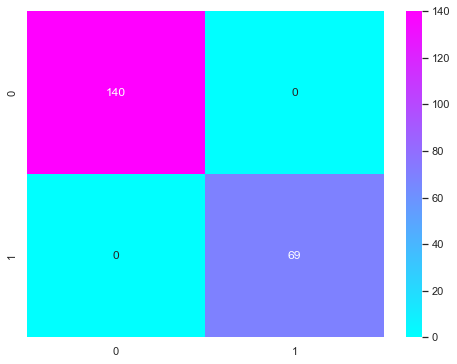

In [35]:
print_model_classification_report(xgb_grid_model.best_estimator_, X_test, y_test)

Accuracy-Score:	1.0	|	Train-Accuracy-Score:	0.7867564534231201
F1-Score:	1.0	|	Train-F1-Score:		0.770813477450938

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00        83

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



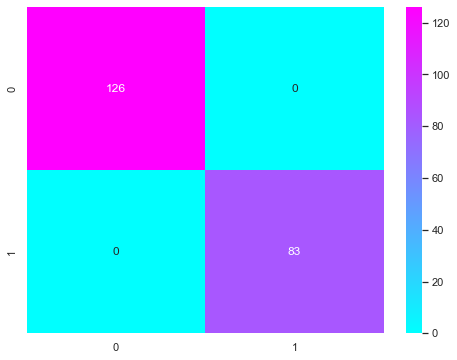

In [36]:
print_model_classification_report(xgb_grid_model.best_estimator_, X_val, y_val)